In [1]:
# imports
import imageio
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import time
import YacuDecuUtility
import itk

In [2]:
# open image and psf
imgName='/home/bnorthan/code/images/Bars-G10-P15-stack-cropped.tif'
psfName='/home/bnorthan/code/images/PSF-Bars-stack-cropped.tif'
img=io.imread(imgName)
psf=io.imread(psfName)

Text(0.5, 1.0, 'psf (max projection)')

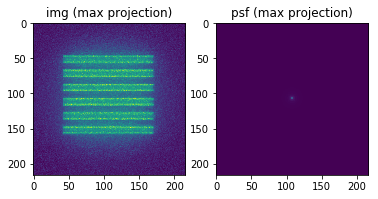

In [3]:
#%matplotlib inline
fig, ax = plt.subplots(1,2)
ax[0].imshow(img.max(axis=0))
ax[0].set_title('img (max projection)')

ax[1].imshow(psf.max(axis=0))
ax[1].set_title('psf (max projection)')

In [4]:
# precondition image and psf
img=img.astype(np.float32)
psf=psf.astype(np.float32)
shifted_psf = np.fft.ifftshift(psf)
result = np.copy(img);
normal=np.ones(img.shape).astype(np.float32)

In [5]:
# get the YacuDecu library
lib=YacuDecuUtility.getYacuDecu()

getYacuDecu
gotYacuDecu!!


In [6]:
# deconvolution using YacuDecu
start=time.time()
lib.deconv_device(10, int(img.shape[0]), int(img.shape[1]), int(img.shape[2]), img, shifted_psf, result, normal)
end=time.time()
print('time is',end-start)


time is 0.3791317939758301


Text(0.5, 1.0, 'result')

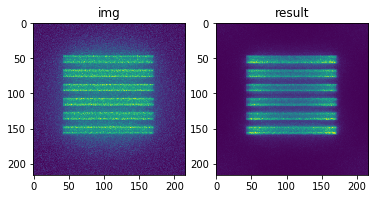

In [7]:
#matplotlib inline
fig, ax = plt.subplots(1,2)
ax[0].imshow(img.max(axis=0))
ax[0].set_title('img')

ax[1].imshow(result.max(axis=0))
ax[1].set_title('result')

In [8]:
imgitk = itk.image_view_from_array(img)   # Convert to ITK object
psfitk = itk.image_view_from_array(psf)  # Convert to ITK object

start=time.time()
deconvolved = itk.richardson_lucy_deconvolution_image_filter(
    imgitk,
    kernel_image=psfitk,
    number_of_iterations=10
)
end=time.time()
print(end-start)

result_itk = itk.array_from_image(deconvolved)

131.89383625984192


Text(0.5, 1.0, 'result itk')

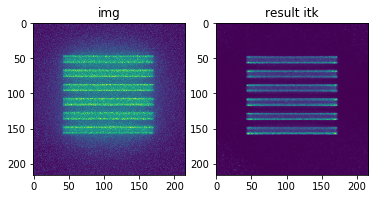

In [13]:
result_itk = itk.array_from_image(deconvolved)

#matplotlib inline
fig, ax = plt.subplots(1,2)
ax[0].imshow(img.max(axis=0))
ax[0].set_title('img')

ax[1].imshow(result_itk.max(axis=0))
ax[1].set_title('result itk')